In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.misc import derivative

In [7]:
#Computing many Taylor series in parallel using the Vandermonde matrix
#Define some functions to take derivatives of
def f1(x):
    return np.cos(x)+np.sin(x)

def f2(x):
    return x**3+4*x**2-1

def f3(x):
    return np.exp(x**3)+np.tanh(x)

In [19]:
#Taylor coefficient
def taylor_c(f,point,order):
    return derivative(f, point, dx=1e-6,n=order)*(1./np.math.factorial(order))

In [38]:
#We choose x as a range and compose a vandermonde matrix with 3  columns and compute the Taylor coefficient for
#combining columns in c (which has to be transposed).
#A particular function approximation is then a column of the matrix multiply of the Vandermonde matrix and the 
#Taylor coefficient matrix.

x=np.arange(0,1,step=0.01)
approx_point=0
vander=np.vander(x,3,increasing=True)
c=np.array([[taylor_c(f1,approx_point,0),taylor_c(f1,approx_point,1),taylor_c(f1,approx_point,2)],
            [taylor_c(f2,approx_point,0),taylor_c(f2,approx_point,1),taylor_c(f2,approx_point,2)],
            [taylor_c(f3,approx_point,0),taylor_c(f3,approx_point,1),taylor_c(f3,approx_point,2)]])
print(c.shape)
print(c)
#Note the transpose
taylor_ser=vander@c.T
print(taylor_ser)

(3, 3)
[[ 1.00000000e+00  1.00000000e+00 -5.00155473e-01]
 [-1.00000000e+00  0.00000000e+00  3.99996702e+00]
 [ 1.00000000e+00  1.00000000e+00 -1.11022302e-04]]
[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00]
 [ 1.00994998e+00 -9.99600003e-01  1.00999999e+00]
 [ 1.01979994e+00 -9.98400013e-01  1.01999996e+00]
 [ 1.02954986e+00 -9.96400030e-01  1.02999990e+00]
 [ 1.03919975e+00 -9.93600053e-01  1.03999982e+00]
 [ 1.04874961e+00 -9.90000082e-01  1.04999972e+00]
 [ 1.05819944e+00 -9.85600119e-01  1.05999960e+00]
 [ 1.06754924e+00 -9.80400162e-01  1.06999946e+00]
 [ 1.07679900e+00 -9.74400211e-01  1.07999929e+00]
 [ 1.08594874e+00 -9.67600267e-01  1.08999910e+00]
 [ 1.09499845e+00 -9.60000330e-01  1.09999889e+00]
 [ 1.10394812e+00 -9.51600399e-01  1.10999866e+00]
 [ 1.11279776e+00 -9.42400475e-01  1.11999840e+00]
 [ 1.12154737e+00 -9.32400557e-01  1.12999812e+00]
 [ 1.13019695e+00 -9.21600646e-01  1.13999782e+00]
 [ 1.13874650e+00 -9.10000742e-01  1.14999750e+00]
 [ 1.14719602e+00 -8.97

(100, 3)


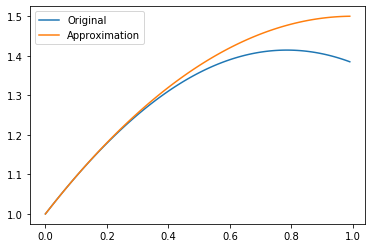

In [42]:
#plot the first function near 0
plt.plot(x,f1(x),label='Original')
plt.plot(x,taylor_ser[:,0],label='Approximation')
plt.legend()
print(taylor_ser.shape)

(100, 3)


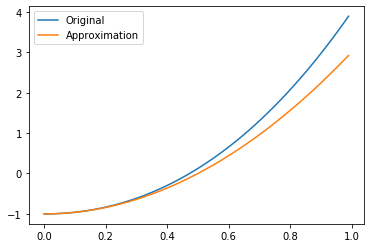

In [44]:
#plot the second function near 0
plt.plot(x,f2(x),label='Original')
plt.plot(x,taylor_ser[:,1],label='Approximation')
plt.legend()
print(taylor_ser.shape)

(100, 3)


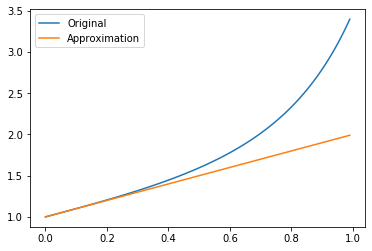

In [45]:
#plot the third function near 0
plt.plot(x,f3(x),label='Original')
plt.plot(x,taylor_ser[:,2],label='Approximation')
plt.legend()
print(taylor_ser.shape)